# Shortest path

Import libraries.

In [7]:
import math
import matplotlib.pyplot as plt
import networkx as nx
import random
%matplotlib inline

For convenience, seed the random number generator to get something reproducible.

In [37]:
random.seed(1214)

Define the cities and their positions.

In [48]:
city_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
cities = {}
for name in city_names:
    cities[name] = (random.random(), random.random())
for city, position in cities.items():
    print('{0}: ({1:.3f}, {2:.3f})'.format(city, position[0], position[1]))

E: (0.666, 0.435)
C: (0.701, 0.188)
A: (0.463, 0.649)
B: (0.589, 0.808)
G: (0.561, 0.333)
F: (0.632, 0.039)
D: (0.914, 0.825)


Define the road network between the cities.

In [41]:
roads = [
    ('A', 'B'),
    ('A', 'D'),
    ('A', 'E'),
    ('B', 'C'),
    ('C', 'D'),
    ('C', 'E'),
]

Define a function to compute the distance between two given cities based on their positions.

In [49]:
def distance(city1, city2, cities):
    return math.sqrt((cities[city1][0] - cities[city2][0])**2 +
                     (cities[city1][1] - cities[city2][1])**2)

Create the graph representing the cities, and the roads between them.

In [39]:
G = nx.Graph()
for road in roads:
    G.add_edge(*road, distance=distance(*road, cities))

Visualize the cities and road networks.

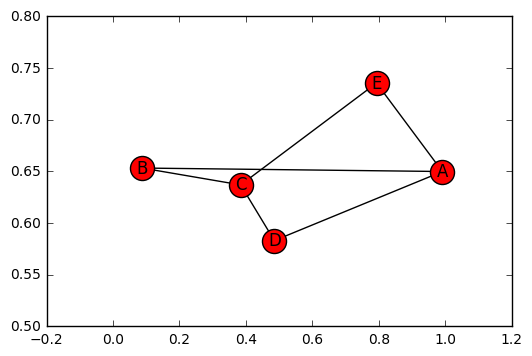

In [43]:
nx.draw_networkx(G, pos=cities, with_labels=True)

Compute the shortest path between city `D`, and all others.

In [44]:
nx.algorithms.shortest_path(G, source='D', weight='distance')

{'A': ['D', 'A'],
 'B': ['D', 'C', 'B'],
 'C': ['D', 'C'],
 'D': ['D'],
 'E': ['D', 'C', 'E']}

Compute the shortest path distances between city `D`, and all others.

In [47]:
for city, dist in nx.algorithms.shortest_path_length(G, source='D', weight='distance').items():
    print('{0}: {1:.3f}'.format(city, dist))

B: 0.412
E: 0.535
C: 0.115
A: 0.510
D: 0.000
